# Gradient Boosting 
## Overview:
**Gradient Boosting** is a powerful <u>Ensemble Learning</u> technique used in Machine Learning for both regression and classification tasks. It is a <u>Sequential technique that combines the predictions of multiple weak learners</u> (usually Decision Trees) to create a strong predictive model. The primary idea behind Gradient Boosting is to build each new learner to correct the errors made by the previous ones.

## History:

Gradient Boosting has evolved over several decades. Here's a brief history of Gradient Boosting:

- **Boosting Concept** (1980s - 1990s): The concept of boosting, which is the fundamental idea behind Gradient Boosting, was introduced by Robert E. Schapire and Yoav Freund in the late 1980s and early 1990s. They developed the AdaBoost (Adaptive Boosting) algorithm, which aimed to improve the performance of weak learners (typically decision trees) by giving more weight to misclassified samples in each iteration.

- **Gradient Boosting Machines:** (1990s): The foundation of Gradient Boosting was laid by Jerome H. Friedman, Trevor Hastie, and Robert Tibshirani in their papers from the late 1990s. They introduced the concept of Gradient Boosting Machines, which extended the idea of boosting to regression problems and introduced the use of gradients (derivatives) to optimize a general loss function. This allowed Gradient Boosting to handle various loss functions, making it versatile for regression and classification.

- **XGBoost** (2014): XGBoost (Extreme Gradient Boosting), developed by Tianqi Chen, was introduced in 2014. It is a highly optimized and efficient Gradient Boosting library known for its speed and performance. XGBoost introduced features like regularization and parallelization, making it popular in machine learning competitions and real-world applications.

- **LightGBM** (2016): LightGBM, developed by Microsoft, is another highly efficient Gradient Boosting library introduced in 2016. It uses a histogram-based approach for tree building, which speeds up training and inference.

- **CatBoost** (2017): CatBoost, developed by Yandex, is a Gradient Boosting library introduced in 2017. It is designed to handle categorical features efficiently without the need for extensive preprocessing.

- **Popularity:** Gradient Boosting, especially with libraries like XGBoost, LightGBM, and CatBoost, became a go-to technique for many machine learning practitioners and data scientists. It has been widely used in competitions like Kaggle and has seen widespread adoption in various industries.  
- **Ongoing Research and Development**: Gradient Boosting **continues to be an active area of research and development**. Researchers are working on improving its efficiency, handling larger datasets, and exploring new applications.

## Algorithm:

1. **Initialization:** Gradient Boosting starts with an initial prediction, which is usually the mean (for regression) or the mode (for classification) of the target variable.

2. **Loss Function:** It defines the measure of the error between the current prediction and the actual target values. Common loss functions include Mean Squared Error (MSE) for regression and Log Loss (also known as cross-entropy loss) for classification. <u>Loss function has to be differiantiable</u>.

3. **Weak Learner (Base Model):** A weak learner (<u>usually a Decision Tree</u>) is trained on the dataset to predict the residuals (the differences between the actual target values and the current predictions) of the previous model. The weak learner typically has a limited depth or number of leaves (a "shallow" tree).

4. **Gradient Descent:** Gradient Boosting optimizes the loss function by using gradient descent. It calculates the negative gradient of the loss function with respect to the current prediction. This gradient points in the direction of the steepest increase in the loss. The goal is to move the predictions in the opposite direction of this gradient to minimize the loss.

   - For regression problems, the negative gradient is the difference between the actual target values and the current predictions multiplied by 2.
   - For classification problems, the negative gradient is the derivative of the log loss with respect to the predicted probabilities.

5. **Update Predictions:** The predictions of the weak learner are scaled by a learning rate (a small value between 0 and 1) and added to the current predictions. This step "boosts" the predictions in the right direction to reduce the loss.

   - For regression, the update is directly added to the previous predictions.
   - For classification, the predicted probabilities are transformed using a logistic (sigmoid) function to update the class probabilities.

6. **Repeat:** Steps 3 to 5 are repeated for a predefined number of iterations or until a stopping criterion is met. Each new weak learner is trained to predict the residuals of the ensemble of all previous learners.

7. **Final Prediction:** The final prediction is the sum of all the predictions made by the weak learners. In regression problems, this is the sum of residuals, and in classification, it's the sum of predicted log-odds (logits) which is then transformed into class probabilities using the logistic (sigmoid) function.

8. **Regularization:** To prevent overfitting, Gradient Boosting often includes regularization techniques like tree pruning, limiting tree depth, and adjusting the learning rate.

## Pros and Cons:

**Pros:**

1. **Allows for Very Precise Loss Function Recovery:** Boosting, particularly Gradient Boosting, is capable of optimizing loss functions to a high degree of precision. This makes it effective for fitting complex relationships in data.

2. **Robust to Overfitting:** Boosting techniques are inherently designed to reduce overfitting by sequentially adding weak learners that correct errors made by previous ones. This can lead to models that generalize well to unseen data.

3. **Compensates for Systematic Error:** Boosting algorithms, through their iterative nature, can effectively compensate for systematic errors made by weak learners. This makes them powerful in situations where individual models may have biases.

4. **Efficiently Handles Various Loss Functions:** Boosting can be adapted to handle various loss functions, making it versatile for a range of tasks, including regression, classification, ranking, and more.

**Cons:**

1. **Relatively Slow:** Boosting, especially with a large number of iterations (weak learners), can be computationally expensive and slower to train compared to algorithms like Random Forest that build trees independently.

2. **Somewhat Difficult to Interpret:** The ensemble of multiple weak learners makes boosting models less interpretable compared to single decision trees or linear models.

3. **Tends to Overfit on Anomalous Values:** If too many weak learners are used or if the model is not properly tuned, boosting algorithms can become sensitive to anomalous values in the training data and may overfit to them.

4. **Requires a Somewhat Large Amount of Training Data:** Boosting, particularly complex variants like Gradient Boosting, may require a relatively large amount of training data to perform well without overfitting.


## Example: Gradient Boosting Machine (Regression)

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (GradientBoostingRegressor, RandomForestRegressor)


#### Partition and scale the data

In [2]:
# Load data
california = fetch_california_housing(as_frame=True)
X = california['data']
y = california['target']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle=True, random_state=42)

# Instantiate scaler
scaler = StandardScaler()

# Fit and transform train and test data
X_train_norm = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_norm, columns = X_train.columns)

X_test_norm = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_norm, columns = X_test.columns)

#### Gradient Boosting Machine from scratch
Now we build traing and make inference with GBM composed of Decision Trees from Sci-Kit Learn library

Custom GBM RMSE Train: 0.46814309644125474


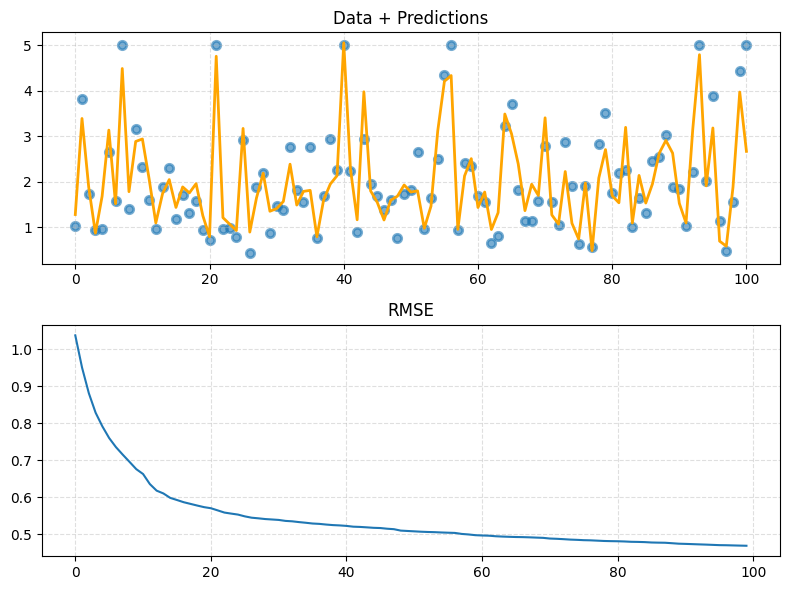

In [3]:
# Initialize the predictions with the mean of the target variable
predictions = np.mean(y_train) * np.ones_like(y_train)

# Set the number of trees (boosting rounds)
n_trees = 100
boosting_mse = []

# Define a learning rate (shrinkage) and create decision trees
learning_rate = 0.2

# Create lists for models and predictions
boosted_trees = []
preds = []

for i in range(n_trees):
    # Calculate the residuals (difference between true target and current predictions)
    residuals = y_train - predictions

    # Fit a decision tree to the residuals (simple decision tree)
    tree = DecisionTreeRegressor(max_depth=3,random_state=42)
    tree.fit(X_train, residuals)

    # Make predictions with the current tree
    tree_predictions = tree.predict(X_train)
    preds.append(tree_predictions)
    
    # Update the predictions with the learning rate and tree predictions
    predictions += learning_rate * tree_predictions
    boosting_mse.append(mean_squared_error(y_train, predictions, squared=False))
    boosted_trees.append(tree)
    
# Final predictions are stored in the 'predictions' variable
final_predictions = predictions

# Evaluate model
mse = mean_squared_error(y_train, final_predictions, squared=False)
print(f"Custom GBM RMSE Train: {mse}")

# Create a figure with subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# Plot the first graph in the first subplot
axes[0].scatter(X_train[0:101].index, y_train[0:101].values, lw=2, alpha=0.6)
axes[0].plot(X_train[0:101].index, final_predictions[0:101], lw=2, c='orange')
axes[0].grid(True, ls='--', alpha=0.4)
axes[0].set_title('Data + Predictions')  # Set a title for the first subplot

# Plot the second graph in the second subplot
axes[1].plot(np.arange(0, n_trees), boosting_mse)
axes[1].grid(True, ls='--', alpha=0.4)
axes[1].set_title('RMSE')  # Set a title for the second subplot

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()


In [4]:
pred_test = np.zeros_like(y_test) + np.mean(y_train)
for tree in boosted_trees:
    preds = tree.predict(X_test)
    pred_test = pred_test + learning_rate * preds

print(f'Custom GBM RMSE Test: {mean_squared_error(y_test, pred_test, squared=False)}')

Custom GBM RMSE Test: 0.5149164839850905


### GradientBoostingMachine via Sci-Kit learn and RandomForestRegressor
Now we will train and make inference with both Sci-Kit's Learn GradientBoostingMaching and RandomForestRegressor models and compare the results of all 3 models.

#### Sci-Kit learn GBM

In [5]:
model_gb = GradientBoostingRegressor(learning_rate = 0.2, max_depth=3, random_state=42)
model_gb.fit(X_train, y_train)

pred_train_gb = model_gb.predict(X_train)
print(f'Sci-Kit Learn GBM RMSE Train: {mean_squared_error(y_train, pred_train_gb, squared=False)}')

pred_test_gb = model_gb.predict(X_test)
print(f'Sci-Kit Learn GBM RMSE Test: {mean_squared_error(y_test, pred_test_gb, squared=False)}')

Sci-Kit Learn GBM RMSE Train: 0.4681430964412548
Sci-Kit Learn GBM RMSE Test: 0.5143505710016611


#### Sci-Kit Learn RandomForestRegressor

In [6]:
model_rfr = RandomForestRegressor(max_depth = 6, n_estimators = 200, random_state=42)
model_rfr.fit(X_train, y_train)

pred_rfr_train = model_rfr.predict(X_train)
print(f'RandomForestRegressor from Sci-Kit Learn RMSE Train: {mean_squared_error(y_train, pred_rfr_train, squared=False)}')

pred_rfr_test = model_rfr.predict(X_test)
print(f'RandomForestRegressor from Sci-Kit Learn RMSE Test: {mean_squared_error(y_test, pred_rfr_test, squared=False)}')

RandomForestRegressor from Sci-Kit Learn RMSE Train: 0.6055619788084476
RandomForestRegressor from Sci-Kit Learn RMSE Test: 0.648330447262998


## Conclusion
- Sci-Kit's Learn implementation of GradientBoostingMachine achieved the best result on the test set with the RMSE score of $0.5143$, which is predictable.
- Our custom implementation of GradientBoostingMachine achieved the second best result with RMSE score  of $0.5149$, which is a surprisingly good result.
- Sci-Kit's Learn RandomForestRegressor achieved the worst result out of 3 models with RMSE score of $0.6483$.